<a href="https://colab.research.google.com/github/sagsshakya/Machine-Learning/blob/master/Machine%20Learning%20LAB/Q16_Multivariate_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q16. Multivariate Regression.
### Problem Statement:
    A  researcher  has  collected  data  on  three  psychological  variables,  four  academic variables (standardized test scores), and the type of educational program the student is in for 600 high school students. She is interested in how the set of psychological variables is related to the academic variables and the type of program the student is in using Multivariate Regression. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_sas('https://stats.idre.ucla.edu/wp-content/uploads/2016/02/mvreg.sas7bdat')
df

,LOCUS_OF_CONTROL,SELF_CONCEPT,READ,WRITE,SCIENCE,MOTIVATION,PROG
0,-1.143955,0.722641,37.405548,39.032845,33.532822,0.368973,2.0
1,0.504134,0.111364,52.760784,51.995041,65.225044,0.520319,2.0
2,1.628546,0.629934,59.771915,54.651653,64.604500,0.436838,2.0
3,0.368096,-0.138528,42.854324,41.121357,48.493809,-0.004324,3.0
4,-0.280190,-0.452226,54.756279,49.947208,50.381657,1.256924,2.0
...,...,...,...,...,...,...,...
595,-1.664108,0.957749,53.002762,56.568569,57.731705,-0.284300,2.0
596,-0.947804,-0.983263,48.866882,66.135147,50.199982,0.457832,3.0
597,-0.435458,-1.302765,73.271301,76.813126,69.573441,-1.459316,1.0
598,-0.964431,0.072325,40.705734,46.886673,42.320671,-0.343068,1.0


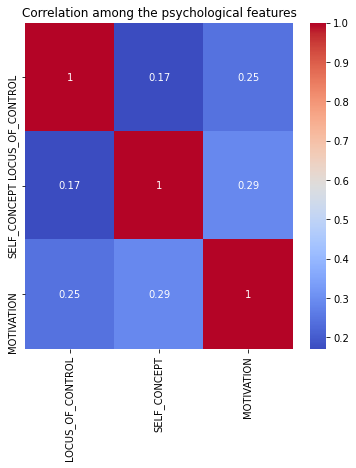

In [4]:
# Correlation among the psychological features.
corr_mat = df[['LOCUS_OF_CONTROL', 'SELF_CONCEPT', 'MOTIVATION']].corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr_mat, cmap = 'coolwarm', annot = True)
plt.title('Correlation among the psychological features')
plt.show()

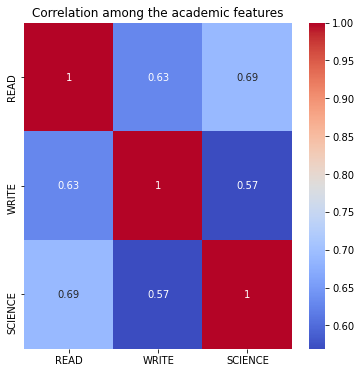

In [5]:
# Correlation among the academic features.
corr_mat = df[['READ', 'WRITE', 'SCIENCE']].corr()

plt.figure(figsize = (6,6))
sns.heatmap(corr_mat, cmap = 'coolwarm', annot = True)
plt.title('Correlation among the academic features')
plt.show()

### MANOVA Assumptions:
    - The dependent variables should be normally distributed within groups. That is, in the example below the dependent variables should be normally distributed within the different treatment groups.
    - Homogeneity of variances across the range of predictors. This assumption can be tested in Python using Bartlett’s test or Levene’s test.
    - Linearity between all pairs of dependent variables (e.g., between depression, life satisfaction, and suicide risk), all pairs of covariates, and all dependent variable-covariate pairs in each cell 

In [6]:
from statsmodels.multivariate.manova import MANOVA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
test = MANOVA.from_formula(formula = 'LOCUS_OF_CONTROL + SELF_CONCEPT + MOTIVATION ~ READ + WRITE + SCIENCE + C(PROG)', data = df)
print(test.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8136 3.0000 592.0000 45.1977 0.0000
          Pillai's trace 0.1864 3.0000 592.0000 45.1977 0.0000
  Hotelling-Lawley trace 0.2290 3.0000 592.0000 45.1977 0.0000
     Roy's greatest root 0.2290 3.0000 592.0000 45.1977 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        C(PROG)         Value  Num DF   Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8914 6.0000 1184.0000 11.6708 0.0000
         Pillai's trace 0.1086 6.0000 1186.0000 11.3550 0.0000
 Hotelling-

In [8]:
test2 = MANOVA.from_formula(formula = 'READ + WRITE + SCIENCE + C(PROG) ~ LOCUS_OF_CONTROL + SELF_CONCEPT + MOTIVATION', data = df)
print(test2.mv_test())

                                 Multivariate linear model
                                                                                            
--------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF          F Value         Pr > F
--------------------------------------------------------------------------------------------
          Wilks' lambda                0.0000 6.0000 591.0000 110901140823998352.0000 0.0000
         Pillai's trace                1.0000 6.0000 591.0000 110901140823998368.0000 0.0000
 Hotelling-Lawley trace 1125899906842623.0000 6.0000 591.0000 110901140823998368.0000 0.0000
    Roy's greatest root 1125899906842623.0000 6.0000 591.0000 110901140823998368.0000 0.0000
--------------------------------------------------------------------------------------------
                                                                                            
-----------